In [3]:
import matplotlib.pyplot as plt
import numpy as np

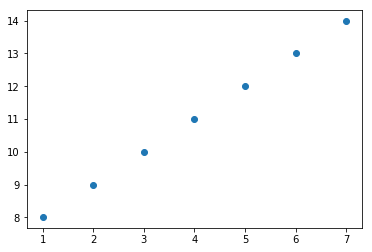

In [24]:
a=np.array([1,2,3,4,5,6,7])  #feature
b=np.array([8,9,10,11,12,13,14])  #label
plt.scatter(a,b)    #used to plot points
plt.show()            #necessary to show the plot

# Calculating m and c manually

In [17]:
import pandas as pd
manual=pd.read_csv('D:\ML.csv')
manual


,a,b,a-mean_a,b-mean_b,product,a-mean_a^2
0,3,4.5,-0.4,-0.24,0.096,0.16
1,2,4,-1.4,-0.74,1.036,1.96
2,2.5,3.7,-0.9,-1.04,0.936,0.81
3,5,6,1.6,1.26,2.016,2.56
4,4.5,5.5,1.1,0.76,0.836,1.21
5,3.4,4.7,0.0,-0.04,0,0
6,mean_a=3.4,mean_b=4.74,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,4.92,6.7
8,NaN,NaN,NaN,NaN,SLOPE= 4.92/6.7,c=b-m*a
9,NaN,NaN,NaN,NaN,0.734328358,4.74-(0.73*3.4)


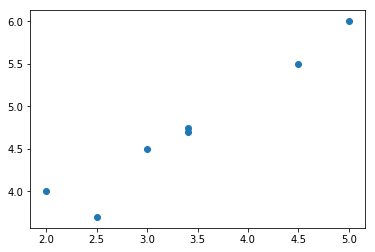

In [18]:
a=np.array([3,2,2.5,5,4.5,3.4,3.4])  #feature
b=np.array([4.5,4,3.7,6,5.5,4.7,4.74])  #label
plt.scatter(a,b)
plt.show()

In [14]:
m=0.734  #slope of line
c=2.258  #intercept of line

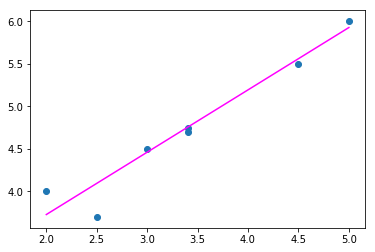

In [19]:
max_x=np.max(a)
min_x=np.min(a)
#x
A=np.linspace(min_x,max_x)  #creates line in the following range
#y
B=m*A+c
plt.scatter(a,b)
plt.plot(A,B,color='#ff00ff')
plt.show()

# Linear Regression using single feature and label

In [23]:
import pandas as pd
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Calculating c and m using function

In [21]:
x=data['TV']
y=data['sales']
len(x)
len(y)


200

0.047536640433
7.03259354913


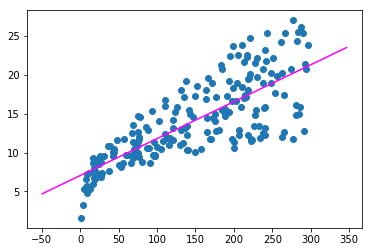

In [26]:
x_mean=np.mean(x)
y_mean=np.mean(y)
num=den=0
for i in range(1,201):
    num+=(x[i]-x_mean)*(y[i]-y_mean)
for i in range(1,201):
    den+=(x[i]-x_mean)**2
slope=num/den
c=y_mean-(slope*x_mean)
print(slope)
print(c)
x_max=np.max(x)+50
x_min=np.min(x)-50
A=np.linspace(x_min,x_max)
B=slope*A+c
plt.scatter(x,y)
plt.plot(A,B,color='#ff00ff')
plt.show()

# Using linear model from sklearn
# (manually splitting data)

In [25]:
X=data['TV'].values
Y=data['sales'].values
#training set with 160 entities
xtrain=X[0:160].reshape(160,1)
ytrain=Y[0:160].reshape(160,1)

#testing set with 40 entities
xtest=X[160:200].reshape(40,1)
ytest=Y[160:200].reshape(40,1)
#scikit learn
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
#training
lin.fit(xtrain,ytrain)
print(lin.intercept_)
print(lin.coef_)
lin.predict([[67]])
ypred=lin.predict(xtest)
c=np.concatenate((ytest,ypred),axis=1)
c
from sklearn import metrics
metrics.mean_absolute_error(ytest,ypred)

[ 7.06877767]
[[ 0.04893566]]


3.0815721235049987

# Train Test Split

In [27]:
#train best split
x=data[['TV','radio']]
y=data[['sales']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
lin.fit(xtrain,ytrain)
lin.intercept_
lin.coef_ 
max_x=xtrain.max()
min_x=xtrain.min()
#A=np.linplane(min_x,max_x)
#A.all()
max_x
ypred=lin.predict(xtest)
ypred
c=np.concatenate((ytest,ypred),axis=1)
metrics.mean_absolute_error(ytest,ypred)

1.5028711068716241